In [1]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

benchmark_files = glob("benchmark_results/*")

all_data = []
trial = 0
for file in benchmark_files:
    with open(file,"r") as o:
        for line in o:
            line = line.strip().split(",")
            line[0] = line[0].split("_")[0]
            line.append(trial)
            all_data.append(line)
        trial += 1

df = pd.DataFrame(all_data)
df.columns = ["Image size","Neighbourhood size",
              "Backend","Time","Trial"]
df["Time"] = df["Time"].astype(float)
df["Image size"] = df["Image size"].astype(int)
df["Neighbourhood size"] = df["Neighbourhood size"].astype(int)

df.head()

,Image size,Neighbourhood size,Backend,Time,Trial
0,128,5,skimage,0.027197,0
1,128,5,torch,0.003826,0
2,256,5,skimage,0.058945,0
3,256,5,torch,0.006191,0
4,512,5,skimage,0.151736,0


/home/jose_almeida/micromamba/envs/mri/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


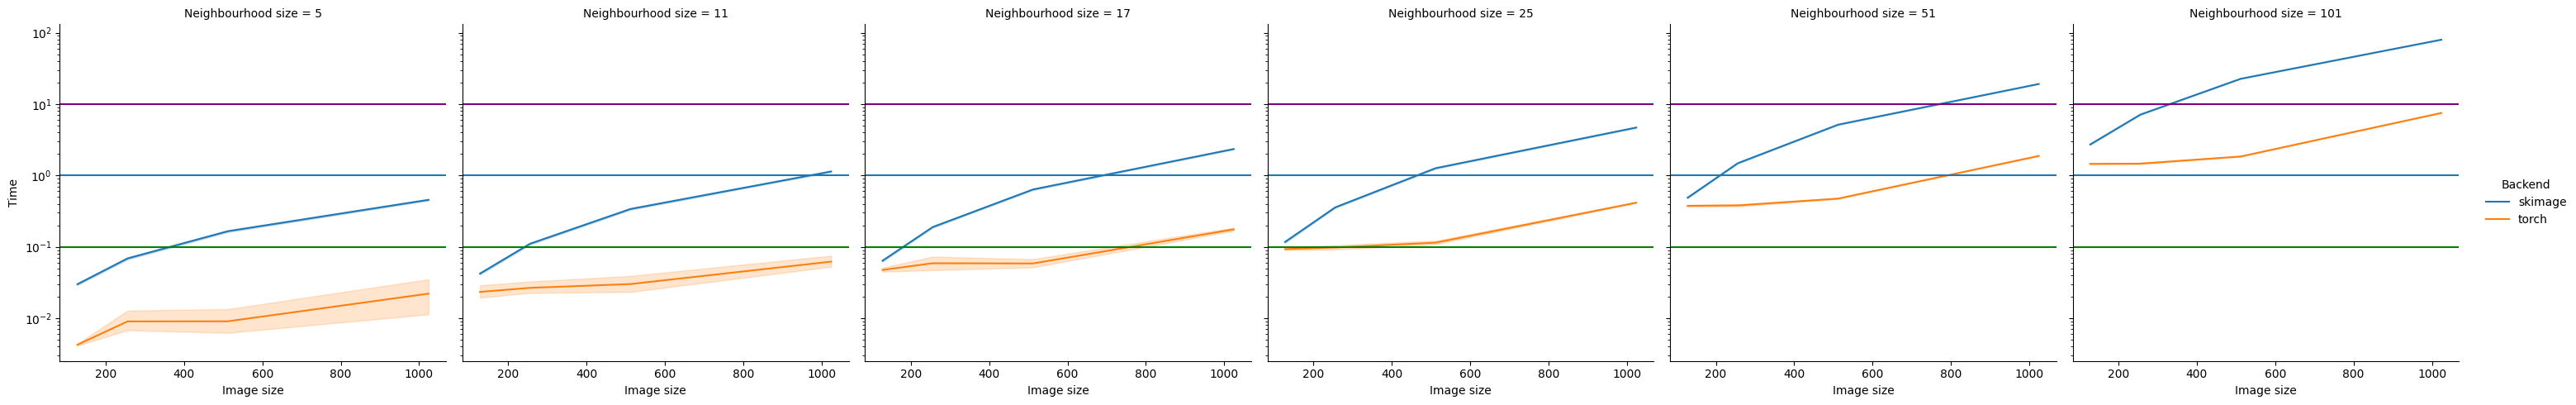

In [3]:
g = sbn.relplot(kind="line",
                x="Image size",
                y="Time",
                hue="Backend",
                col="Neighbourhood size",
                data=df)

g.set(yscale="log")
for ax in g.axes[0]:
    ax.axhline(0.1,c="green")
    ax.axhline(1.0)
    ax.axhline(10.0,c="purple")

/home/jose_almeida/micromamba/envs/mri/lib/python3.11/site-packages/seaborn/relational.py:858: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)
/home/jose_almeida/micromamba/envs/mri/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


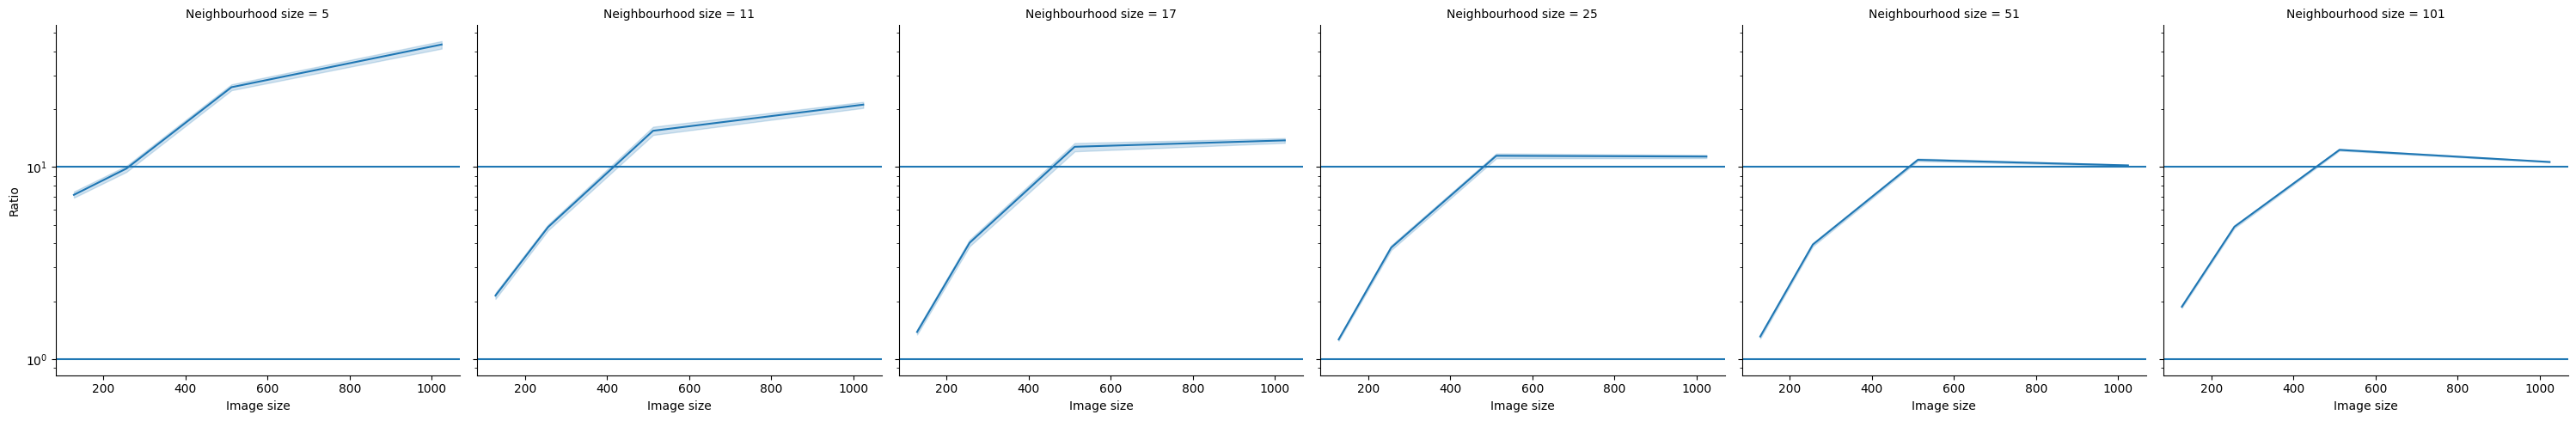

In [5]:
df_compare = df.pivot(
    columns=["Backend"],
    index=["Image size","Neighbourhood size","Trial"],
    values="Time").reset_index()
df_compare["Ratio"] = df_compare["skimage"] / df_compare["torch"]

g = sbn.relplot(kind="line",
                x="Image size",
                y="Ratio",
                col="Neighbourhood size",
                data=df_compare,
                ax=ax)

g.set(yscale="log")
for ax in g.axes[0]:
    ax.axhline(1.0)
    ax.axhline(10)